IMPORT DEPENDENCIES

In [1]:
# Library
import re
import numpy as np
from numpy import split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LOAD DATA

In [2]:
# Dataset
df = pd.read_csv(r'D:\Data Science - Binar Academy Wave 2\PLATINUM\Challange\challenge_platinum\train_preprocess_clean.csv', sep=',',encoding='utf-8')
df

,id,data,label,kategori_label,ln_text
0,0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,2,404
1,1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,1,102
2,2,lokasi strategis di jalan sumatera bandung . t...,positive,2,184
3,3,betapa bahagia nya diri ini saat unboxing pake...,positive,2,93
4,4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,0,214
...,...,...,...,...,...
10928,10993,f - demokrat dorong upaya kemandirian energi n...,neutral,1,53
10929,10994,tidak bosan,positive,2,11
10930,10996,enak rasa masakan nya apalagi kepiting yang me...,positive,2,156
10931,10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,0,67


CLEANSING DATA

In [3]:
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)

In [4]:
df['data'] = df['data'].str.strip('[')
df['data'] = df['data'].str.strip(']')
df['data'] = df['data'].str.strip(')')
df['data'] = df['data'].str.strip('(')
## Gunakan strip function untuk menghapus karakter spesial

In [5]:
df

,id,data,label,kategori_label,ln_text
0,0,warung ini dimiliki oleh pengusaha paik tahu y...,positive,2,404
1,1,mohon ulama lurus dan k mmi hujjah partai apa ...,neutral,1,102
2,2,lokasi strategis di jalan sumatera bandung . t...,positive,2,184
3,3,betapa bahagia nya diri ini saat unboxing pake...,positive,2,93
4,4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,0,214
...,...,...,...,...,...
10928,10993,f demokrat dorong upaya kemandirian energi na...,neutral,1,53
10929,10994,tidak bosan,positive,2,11
10930,10996,enak rasa masakan nya apalagi kepiting yang me...,positive,2,156
10931,10998,pagi pagi di tol pasteur sudah macet parah bi...,negative,0,67


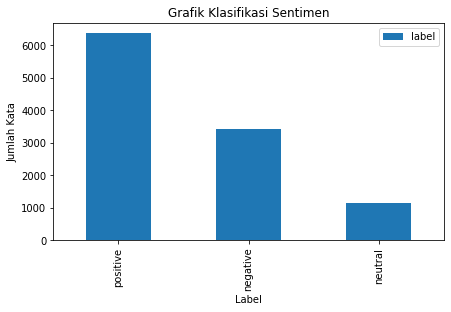

In [6]:
# Chart Klasifikasi Sentimen
df["label"].value_counts().plot.bar(figsize = (7, 4))
plt.title('Grafik Klasifikasi Sentimen')
plt.xlabel('Label')
plt.ylabel('Jumlah Kata')
plt.legend()
plt.show()

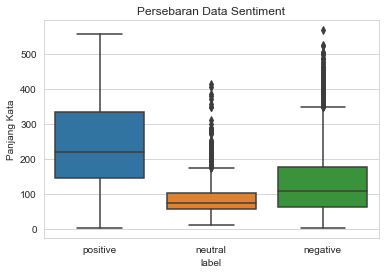

In [7]:
# Box Plot
sns.set_style('whitegrid')
sns.boxplot(y = df['ln_text'] , x = df['label']);
plt.ylabel('Panjang Kata')
plt.title('Persebaran Data Sentiment')
plt.show()

In [8]:
#menghitung jumlah sentimen berdasarkan label

label_count = df["label"].apply(lambda x: x.split(',')).apply(lambda x: pd.Series(x)).stack().value_counts()
label_count = pd.DataFrame({"label":label_count.index,"total":label_count.values})
label_count

,label,total
0,positive,6383
1,negative,3412
2,neutral,1138


In [9]:
Text=df['data']

In [10]:
token=Text.to_numpy

In [11]:
token=nltk.sent_tokenize(str(token))
## Tokenisasi kalimat

In [12]:
data = np.array(token)
## Save token dalam bentuk array

In [13]:
stop = stopwords.words('english')
## Save stopword di dalam stop 

In [14]:
# Menghilangkan stopwords dari dataframe
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw)   
## Menghapus stopwords dari text dan mencetak kata tanpa stopwords

['[', "'", '<', 'bound', 'method', 'IndexOpsMixin.to_numpy', '0', 'warung', 'ini', 'dimiliki', 'oleh', 'pengusaha', 'paik', 'tahu', '...', '\\n1', 'mohon', 'ulama', 'lurus', 'dan', 'k', 'mmi', 'hujjah', 'partai', 'apa', '...', '\\n2', 'lokasi', 'strategis', 'di', 'jalan', 'sumatera', 'bandung', '.', "'", "'t", '...', '\\n3', 'betapa', 'bahagia', 'nya', 'diri', 'ini', 'saat', 'unboxing', 'pake', '...', '\\n4', 'duh', '.', "'", "'jadi", 'mahasiswa', 'jangan', 'sombong', 'dong', '.', "'", "'kas", '...', '\\n', '...', '\\n10928', 'f', 'demokrat', 'dorong', 'upaya', 'kemandirian', 'energi', 'na', '...', '\\n10929', 'tidak', 'bosan\\n10930', 'enak', 'rasa', 'masakan', 'nya', 'apalagi', 'kepiting', 'yang', '...', '\\n10931', 'pagi', 'pagi', 'di', 'tol', 'pasteur', 'sudah', 'macet', 'parah', 'bi', '...', '\\n10932', 'meskipun', 'sering', 'belanja', 'ke', 'yogya', 'di', 'riau', 'junct', '...', '\\nName', ':', 'data', ',', 'Length', ':', '10933', ',', 'dtype', ':', 'object', '>', "'", ']']


Visualisasi

In [15]:
stopwords = set(stopwords.words("english"))
## Menghapus stopwords dalam rangka visualisasi word cloud

In [16]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
## WordCloud menampilkan kata yang paling banyak muncul

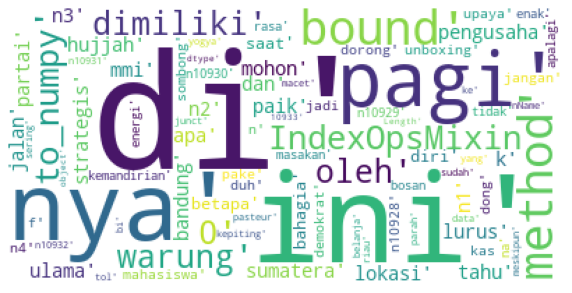

In [17]:
# Visualisasi kata yang paling banyak diulangn dalam dataframe memggunakan wordcloud
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
# Menghitung berapa kali sebuah kata muncul dari seluruh data
tokens_without_sw=(str(tokens_without_sw))

In [19]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# Menghapus stopwords untuk menampilkan kata dan count nya    

In [20]:
counted_words.most_common(100) 

[("'...',", 10),
 ('"\'",', 5),
 ("'di',", 3),
 ("'.',", 3),
 ("':',", 3),
 ("'ini',", 2),
 ("'nya',", 2),
 ("'pagi',", 2),
 ("',',", 2),
 ("['[',", 1),
 ("'<',", 1),
 ("'bound',", 1),
 ("'method',", 1),
 ("'IndexOpsMixin.to_numpy',", 1),
 ("'0',", 1),
 ("'warung',", 1),
 ("'dimiliki',", 1),
 ("'oleh',", 1),
 ("'pengusaha',", 1),
 ("'paik',", 1),
 ("'tahu',", 1),
 ("'\\\\n1',", 1),
 ("'mohon',", 1),
 ("'ulama',", 1),
 ("'lurus',", 1),
 ("'dan',", 1),
 ("'k',", 1),
 ("'mmi',", 1),
 ("'hujjah',", 1),
 ("'partai',", 1),
 ("'apa',", 1),
 ("'\\\\n2',", 1),
 ("'lokasi',", 1),
 ("'strategis',", 1),
 ("'jalan',", 1),
 ("'sumatera',", 1),
 ("'bandung',", 1),
 ('"\'t",', 1),
 ("'\\\\n3',", 1),
 ("'betapa',", 1),
 ("'bahagia',", 1),
 ("'diri',", 1),
 ("'saat',", 1),
 ("'unboxing',", 1),
 ("'pake',", 1),
 ("'\\\\n4',", 1),
 ("'duh',", 1),
 ('"\'jadi",', 1),
 ("'mahasiswa',", 1),
 ("'jangan',", 1),
 ("'sombong',", 1),
 ("'dong',", 1),
 ('"\'kas",', 1),
 ("'\\\\n',", 1),
 ("'\\\\n10928',", 1),
 ("'f

Visualisasi top 10 kata yang paling sering muncul.

<BarContainer object of 10 artists>

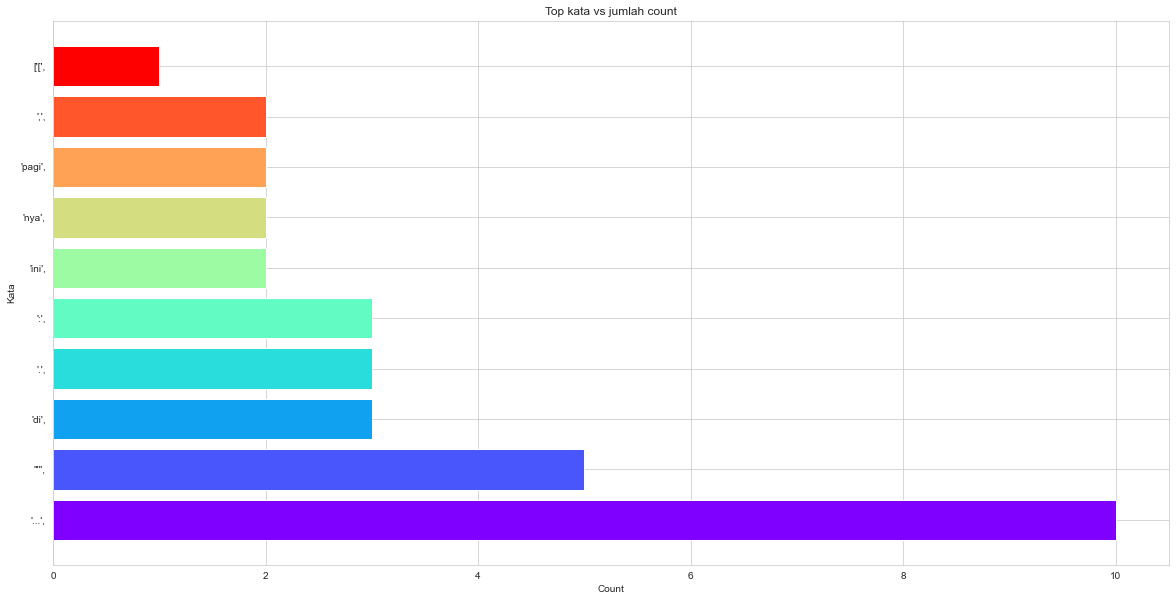

In [21]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top kata vs jumlah count')
plt.xlabel('Count')
plt.ylabel('Kata')
plt.barh(words, counts, color=colors)

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        neg_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        pos_word_list.append(word)
    else:        
        neu_word_list.append(word)                

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
score = sid.polarity_scores(sentence)
print('\nScores:', score)

Positive: []
Neutral: ['[', "'", '[', "'", ',', '``', "'", "''", ',', "'", '<', "'", ',', "'bound", "'", ',', "'method", "'", ',', "'IndexOpsMixin.to_numpy", "'", ',', "'", '0', "'", ',', "'warung", "'", ',', "'ini", "'", ',', "'dimiliki", "'", ',', "'oleh", "'", ',', "'pengusaha", "'", ',', "'paik", "'", ',', "'tahu", "'", ',', "'", '...', "'", ',', "'\\\\n1", "'", ',', "'mohon", "'", ',', "'ulama", "'", ',', "'lurus", "'", ',', "'dan", "'", ',', "'", 'k', "'", ',', "'mmi", "'", ',', "'hujjah", "'", ',', "'partai", "'", ',', "'apa", "'", ',', "'", '...', "'", ',', "'\\\\n2", "'", ',', "'lokasi", "'", ',', "'strategis", "'", ',', "'di", "'", ',', "'jalan", "'", ',', "'sumatera", "'", ',', "'bandung", "'", ',', "'", '.', "'", ',', '``', "'", "''", ',', '``', "'t", "''", ',', "'", '...', "'", ',', "'\\\\n3", "'", ',', "'betapa", "'", ',', "'bahagia", "'", ',', "'nya", "'", ',', "'diri", "'", ',', "'ini", "'", ',', "'saat", "'", ',', "'unboxing", "'", ',', "'pake", "'", ',', "'", '...', "

In [23]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [24]:
df.head()

,id,data,label,kategori_label,ln_text,neg,neu,pos,compound
0,0,warung ini dimiliki oleh pengusaha paik tahu y...,positive,2,404,0.0,1.0,0.0,0.0
1,1,mohon ulama lurus dan k mmi hujjah partai apa ...,neutral,1,102,0.0,1.0,0.0,0.0
2,2,lokasi strategis di jalan sumatera bandung . t...,positive,2,184,0.0,1.0,0.0,0.0
3,3,betapa bahagia nya diri ini saat unboxing pake...,positive,2,93,0.0,1.0,0.0,0.0
4,4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,0,214,0.0,1.0,0.0,0.0


Mengurutkan dataset berdasarkan score Compound untuk menentukan kalimat yang paling penting

In [25]:
imp_sent=df.sort_values(by='compound', ascending=False)
imp_sent

,id,data,label,kategori_label,ln_text,neg,neu,pos,compound
4529,4541,resto ini suasana nya nyaman dengan layanan ya...,positive,2,417,0.000,0.803,0.197,0.9432
765,765,there was some gazebo atau balebale as the din...,positive,2,367,0.000,0.816,0.184,0.9300
2212,2215,sangat menikmati teh yang disediakan di sini ...,positive,2,294,0.000,0.760,0.240,0.9274
7496,7526,kami mengunjungi winner atwurst sebenarnya tid...,negative,0,475,0.000,0.855,0.145,0.9081
844,844,warisan sbyudhoyono the king of pencitraan dan...,neutral,1,207,0.000,0.721,0.279,0.9042
...,...,...,...,...,...,...,...,...,...
10594,10654,id : buat kamu yang menantikan limited edition...,neutral,1,118,0.243,0.757,0.000,-0.6996
6967,6994,ini adalah salah satu makanan cina di bandung ...,positive,2,309,0.089,0.911,0.000,-0.7177
8301,8338,menjelang sore saya menuju kampung daun karena...,positive,2,398,0.109,0.891,0.000,-0.7579
4789,4801,boleh dicoba buat kalian yang kuliner di bandu...,positive,2,212,0.159,0.841,0.000,-0.7650


In [26]:
print(df['data'].iloc[4529] ) # kalimat dengan index 4529 mempunyai score compound paling tinggi  
                             # menjadikannya kalimat paling penting dari seluruh teks 

resto ini suasana nya nyaman dengan layanan yang baik . penataan ruangan nya cukup serasi . menawarkan berbagai menu pizza dan pasta seperti super supreme  cheeseburger  deluxe cheese  tuna melt  american favourite  beef spaghetti  beef lasagna dan lainnya . super supreme rasanya sangat enak dan nikmat . beef spaghetti rasanya enak dan mantap . deluxe cheese sangat nikmat dengan rasa keju nya sangat terasa .


Menemukan kalimat paling negatif dalam data

In [27]:
neg_sent=df.sort_values(by='neg', ascending=False)
neg_sent

,id,data,label,kategori_label,ln_text,neg,neu,pos,compound
1945,1948,goblok fpi bangsat terrorist,negative,0,28,0.610,0.390,0.000,-0.6908
5331,5350,selamat sore minimal .,neutral,1,22,0.455,0.545,0.000,-0.3612
10053,10113,ditinggalkan gerindra nasib nya ass diujung ...,neutral,1,54,0.368,0.632,0.000,-0.5423
5098,5114,ban dalam deli . x . per .,neutral,1,36,0.340,0.660,0.000,-0.5574
7572,7604,mau marah nih indosat trouble melulu dah,negative,0,40,0.310,0.690,0.000,-0.4019
...,...,...,...,...,...,...,...,...,...
3723,3730,salah satu rumah makan babi panggang yang waji...,positive,2,170,0.000,0.943,0.057,0.2023
3724,3731,bersyukur itu tidak kecewa dengan apa pun yang...,positive,2,107,0.000,1.000,0.000,0.0000
3725,3732,waktu kami datang kami dalam daftar tunggu wa...,positive,2,404,0.000,1.000,0.000,0.0000
3726,3733,menikmati makan malam dengan pemandangan kota ...,positive,2,380,0.000,0.956,0.044,0.4019


In [32]:
print(df['data'].iloc[1945] ) # Kalimat dengan index 8795 adalah kalimat dengan nilai negatif tertinggi

goblok fpi bangsat terrorist
